In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("C:\\Users\\User\\Downloads\\winequality-white.csv",sep=';')# because the values are seprated with ':'

In [10]:
data.head()#returns the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
data.tail() #returns the last 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [12]:
data.shape  #4898 rows,12 columns

(4898, 12)

In [13]:
data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [15]:
data.info() #dependent variable is integer and all independent are float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
data.describe()
#compare mean value with 50 percentile mean is > than that
#compare max value with 75 percentile max is far> than that

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


As we see there is large difference between residual sugar,free sulphur dioxide,total sulphur dioxide there is a large difference in the max and 75 percentile values.so we can estimate there are high outliers.

In [19]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

as we see the target variable quality is a categorical and it contains ratings in range 1 to 10

In [20]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

most values belong to rating 6 and 5,7 and very less rows/observations for 3 and 9

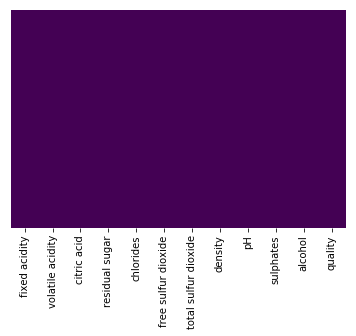

In [25]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

The only one colour shade indicates there are no missing values

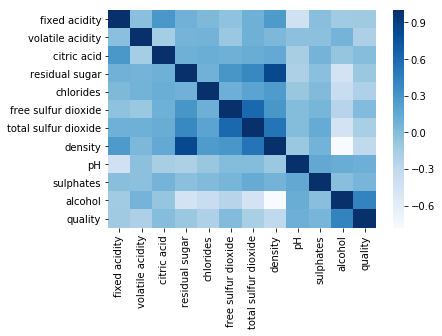

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=False)

there is strong relationship between residual sugar and density

In [28]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [1]:
from sklearn.decomposition import PCA

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [13]:
x=data.iloc[:,0:11]
y=data.iloc[:,-1].values

In [14]:
y

array([6, 6, 6, ..., 6, 7, 6], dtype=int64)

In [15]:
from sklearn.preprocessing import StandardScaler

In [19]:
x=StandardScaler().fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [20]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
0     4898 non-null float64
1     4898 non-null float64
2     4898 non-null float64
3     4898 non-null float64
4     4898 non-null float64
5     4898 non-null float64
6     4898 non-null float64
7     4898 non-null float64
8     4898 non-null float64
9     4898 non-null float64
10    4898 non-null float64
dtypes: float64(11)
memory usage: 421.0 KB


In [21]:
pca=PCA()
x_pca=pca.fit_transform(x)
x_pca=pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274


In [22]:
print("explained variance",pca.explained_variance_)
print("proportion explained variance",pca.explained_variance_ratio_)

explained variance [3.2229119  1.57556161 1.22192081 1.01873034 0.97353334 0.93893321
 0.7267464  0.59948087 0.41422824 0.28954625 0.0206533 ]
proportion explained variance [0.29293217 0.14320363 0.11106103 0.09259294 0.08848496 0.08534014
 0.06605437 0.05448713 0.03764942 0.02631701 0.00187719]


In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29293217, 0.4361358 , 0.54719683, 0.63978977, 0.72827474,
       0.81361487, 0.87966924, 0.93415637, 0.9718058 , 0.99812281,
       1.        ])

In [25]:
x_pca['target']=y
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,target
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190,6
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904,6
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295,6
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6


In [26]:
x_pca.columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','target']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,target
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664,-1.025184,0.150609,-0.075905,0.042190,6
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998,0.584930,-1.063550,-0.253919,0.127904,6
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319,0.974902,0.549654,0.855570,-0.184295,6
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702,0.601653,0.293244,-0.403700,-0.045274,6


Text(0, 0.5, 'proportion of explained variance')

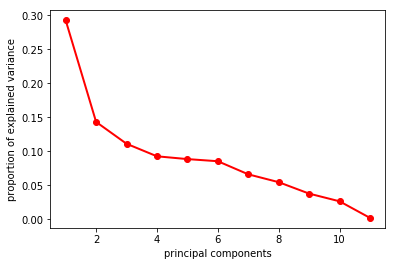

In [28]:
PC_values=np.arange(pca.n_components_)+1
plt.plot(PC_values,pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.xlabel('principal components')
plt.ylabel("proportion of explained variance")

In [31]:
loading=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'],index=x.columns)
loading

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.157218,-0.587558,0.121368,0.018584,0.251048,-0.103531,-0.197849,0.588355,0.330523,0.131705,-0.171290
1,0.005089,0.051728,-0.590971,0.274115,0.642617,0.122338,0.269355,0.028373,-0.145910,0.223722,-0.017057
2,0.144050,-0.345295,0.504397,0.148514,0.053905,0.132097,0.705481,-0.152287,-0.202011,0.037351,-0.009721
3,0.427408,0.008749,-0.214320,-0.273765,0.011391,-0.289447,0.212760,-0.388186,0.408969,-0.094468,-0.490226
4,0.212011,-0.008800,-0.102367,0.710712,-0.328628,0.395821,-0.079484,-0.100151,0.393535,-0.053374,-0.025399
5,0.300334,0.290355,0.279410,-0.305585,0.176912,0.494494,-0.166779,-0.081799,0.144073,0.567451,0.030908
6,0.406652,0.244032,0.124375,-0.060456,0.293010,0.276320,-0.067730,0.247314,-0.154540,-0.709120,-0.035561
7,0.511524,0.006297,-0.129203,-0.022061,-0.084588,-0.327651,0.110385,0.069026,0.087888,0.068374,0.759779
8,-0.128832,0.581344,0.126672,0.097753,-0.119826,-0.193341,0.427313,0.533881,0.261298,0.110733,-0.141197
9,0.043379,0.222695,0.433244,0.442060,0.400585,-0.481039,-0.308562,-0.270394,-0.011698,0.057708,-0.041833


1) Density7
2)ph8
3) citric acid2
4-chlorides 4
5-volatile acidity1
6-free sulfur dioxide 5

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [34]:
from sklearn.cluster import KMeans

In [35]:
distortion=[]
k=range(1,15)
for i in k:
    kmeanmodel=KMeans(n_clusters=i,max_iter=25)
    kmeanmodel.fit(x)
    distortion.append(kmeanmodel.inertia_)

Text(0, 0.5, 'distortion')

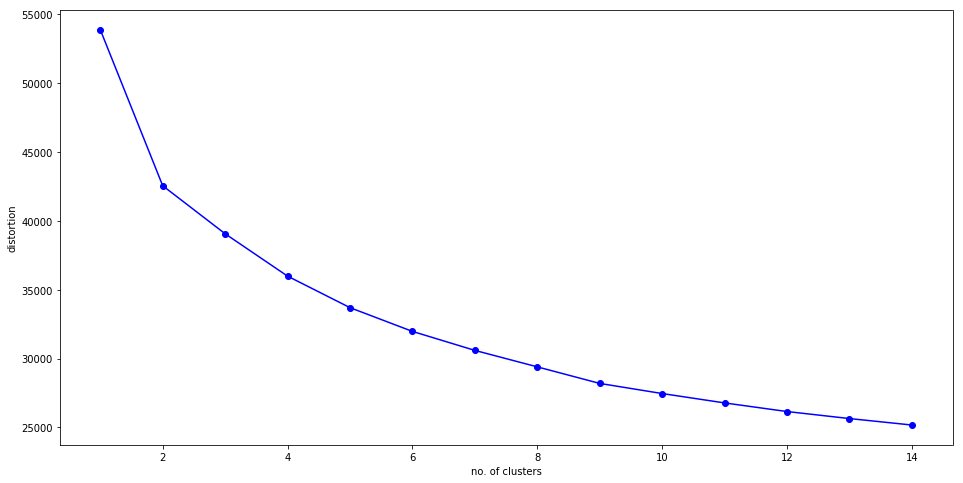

In [36]:
plt.figure(figsize=(16,8))
plt.plot(k, distortion, 'bo-')
plt.xlabel('no. of clusters')
plt.ylabel('distortion')

In [37]:
kmeanmodelfinal=KMeans(n_clusters=6)
kmeanmodelfinal.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [42]:
x['kmeans']=kmeanmodelfinal.predict(x)
x['target']=y

Text(0.5, 1.0, 'kemans')

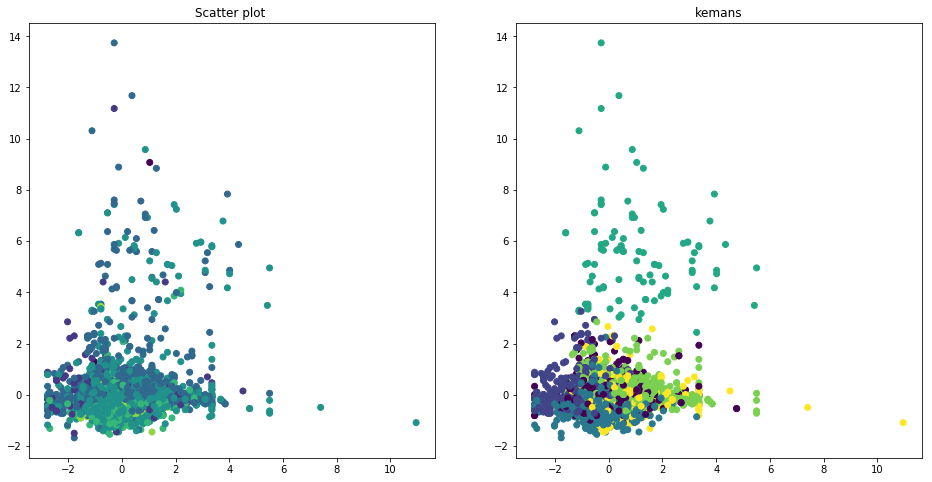

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x[2],x[4],c=x['target'])
axes[0].set_title('Scatter plot ')
axes[1].scatter(x[2],x[4],c=x['kmeans'])
axes[1].set_title('kemans')

In [48]:
x[['kmeans','target']].head(25)

,kmeans,target
0,4,6
1,0,6
2,5,6
3,4,6
4,4,6
5,5,6
6,1,6
7,4,6
8,0,6
9,5,6


In [66]:
x_pca_trial=x_pca.iloc[:,0:7]

In [67]:
x_pca_trial.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.676944,-0.545233,-0.930422,-1.135374,-0.292855,-0.891620,0.204664
1,-0.644588,0.430770,-0.356331,0.999117,-0.714078,-0.483738,0.436998
2,0.155291,-1.189800,-0.017532,0.270219,-0.367706,-0.500682,0.554319
3,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702
4,1.455374,0.099680,-0.001956,-0.423022,-0.469981,0.769261,-0.197702


In [68]:
kmeanmodelfinal=KMeans(n_clusters=4)
kmeanmodelfinal.fit(x_pca_trial)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
x_pca_trial['kmeans']=kmeanmodelfinal.predict(x_pca_trial)
x_pca_trial['target']=y

In [71]:
x_pca_trial[['target','kmeans']].tail(10)

,target,kmeans
4888,5,3
4889,6,2
4890,6,3
4891,6,1
4892,5,1
4893,6,1
4894,5,2
4895,6,3
4896,7,1
4897,6,1


Text(0.5, 1.0, 'kemans')

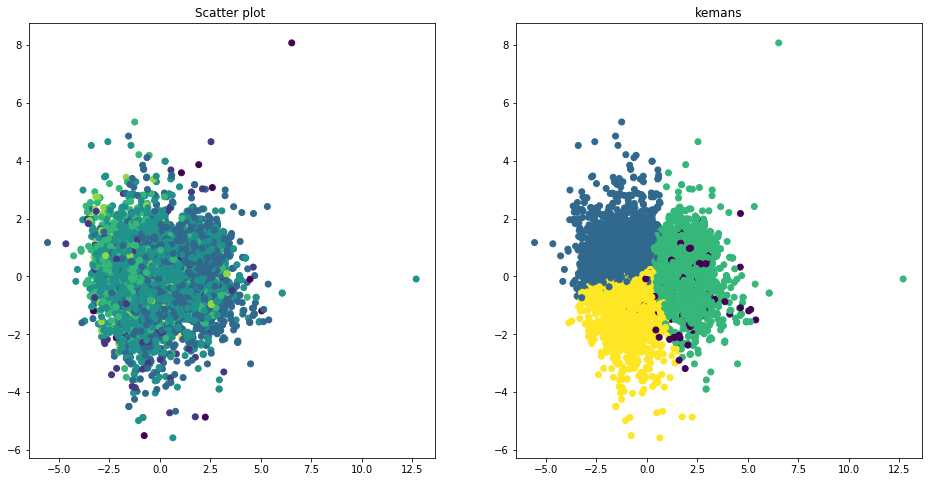

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x_pca_trial['PC1'],x_pca_trial['PC2'],c=x_pca_trial['target'])
axes[0].set_title('Scatter plot ')
axes[1].scatter(x_pca_trial['PC1'],x_pca_trial['PC2'],c=x_pca_trial['kmeans'])
axes[1].set_title('kemans')

In [76]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,kmeans,target
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,4,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,5,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,4,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,4,6


In [88]:
x_pca_trial2=x.iloc[:,[1,2,4,5,7,8]]
x_pca_trial2.head()

,1,2,4,5,7,8
0,-0.081770,0.213280,-0.035355,0.569932,2.331512,-1.246921
1,0.215896,0.048001,0.147747,-1.253019,-0.009154,0.740029
2,0.017452,0.543838,0.193523,-0.312141,0.358665,0.475102
3,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480
4,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480


In [89]:
x_pca_trial2.columns=['volatile acidity','citric acid','chloride','free sulphur dioxide','density','ph']
x_pca_trial2.head()

,volatile acidity,citric acid,chloride,free sulphur dioxide,density,ph
0,-0.081770,0.213280,-0.035355,0.569932,2.331512,-1.246921
1,0.215896,0.048001,0.147747,-1.253019,-0.009154,0.740029
2,0.017452,0.543838,0.193523,-0.312141,0.358665,0.475102
3,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480
4,-0.478657,-0.117278,0.559727,0.687541,0.525855,0.011480


In [90]:
kmeanmodelfinal=KMeans(n_clusters=6)
kmeanmodelfinal.fit(x_pca_trial2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
x_pca_trial2['kmeans']=kmeanmodelfinal.predict(x_pca_trial2)
x_pca_trial2['target']=y

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [92]:
x_pca_trial2[['target','kmeans']].head(20)

,target,kmeans
0,6,4
1,6,1
2,6,1
3,6,4
4,6,4
5,6,1
6,6,3
7,6,4
8,6,1
9,6,2


1) Density7
2)ph8
3) citric acid2
4-chlorides 4
5-volatile acidity1
6-free sulfur dioxide 5